In [1]:
import pandas as pd

# Load the uploaded CSV file to analyze its contents
file_path = 'bike_buyers.csv'
data = pd.read_csv(file_path)

# Display the first few rows and basic info about the dataset to understand its structure
data_info = data.info()
data_preview = data.head()

data_info, data_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


(None,
       ID Marital Status  Gender   Income  Children        Education  \
 0  12496        Married  Female  40000.0       1.0        Bachelors   
 1  24107        Married    Male  30000.0       3.0  Partial College   
 2  14177        Married    Male  80000.0       5.0  Partial College   
 3  24381         Single     NaN  70000.0       0.0        Bachelors   
 4  25597         Single    Male  30000.0       0.0        Bachelors   
 
        Occupation Home Owner  Cars Commute Distance   Region   Age  \
 0  Skilled Manual        Yes   0.0        0-1 Miles   Europe  42.0   
 1        Clerical        Yes   1.0        0-1 Miles   Europe  43.0   
 2    Professional         No   2.0        2-5 Miles   Europe  60.0   
 3    Professional        Yes   1.0       5-10 Miles  Pacific  41.0   
 4        Clerical         No   0.0        0-1 Miles   Europe  36.0   
 
   Purchased Bike  
 0             No  
 1             No  
 2             No  
 3            Yes  
 4            Yes  )

C:\Users\DELL\AppData\Local\Temp\ipykernel_1396\3276464394.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Purchased Bike", y="Income", data=cleaned_data, palette="Set2")
C:\Users\DELL\AppData\Local\Temp\ipykernel_1396\3276464394.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Age Group'] = pd.cut(cleaned_data['Age'], bins=[0, 25, 35, 45, 55, 65, 100],
C:\Users\DELL\AppData\Local\Temp\ipykernel_1396\3276464394.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current be

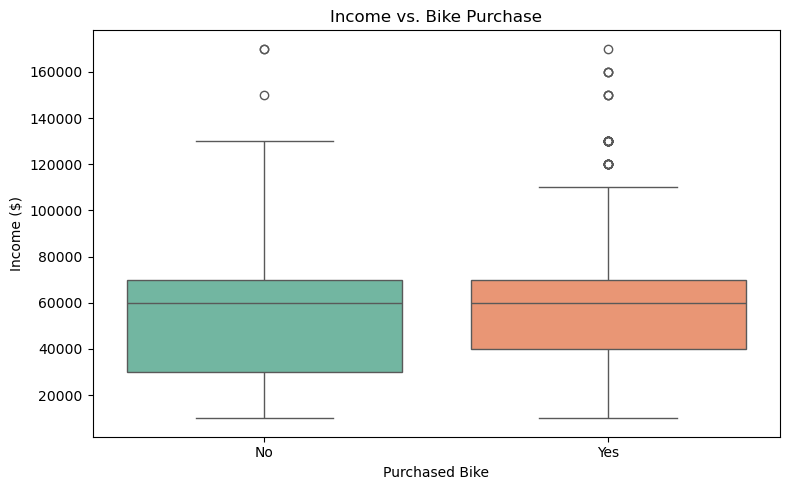

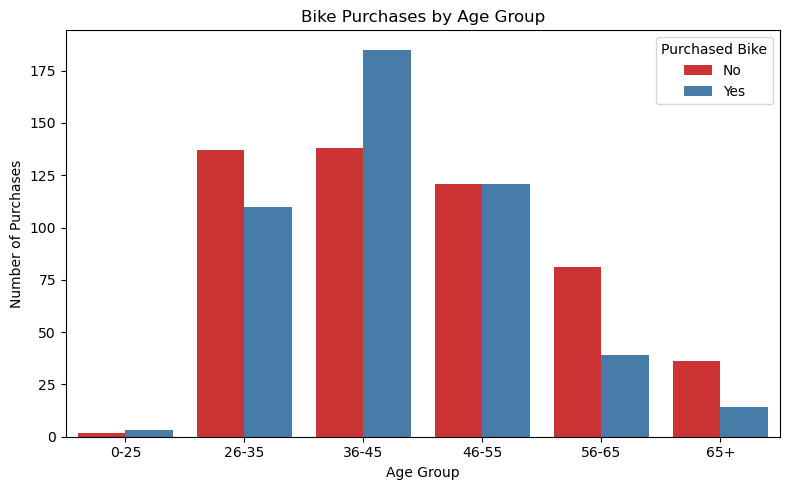

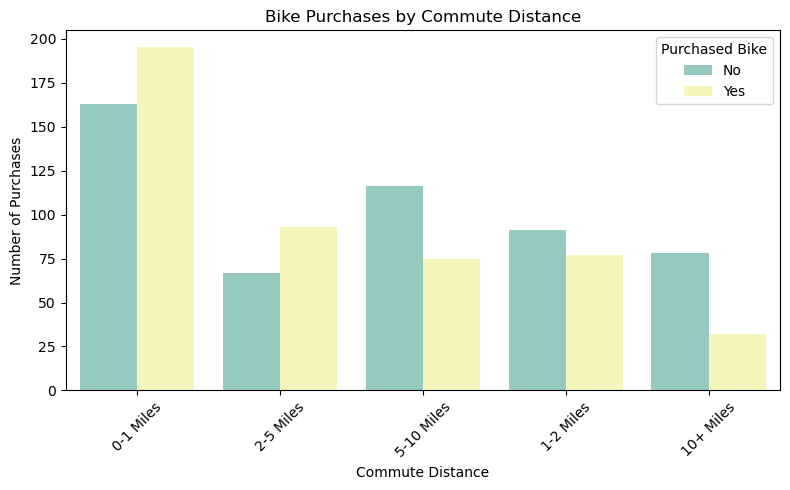

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean data: Drop rows with missing values for relevant columns
cleaned_data = data.dropna(subset=["Income", "Age", "Purchased Bike", "Commute Distance"])

# Chart 1: Income vs. Bike Purchase
plt.figure(figsize=(8, 5))
sns.boxplot(x="Purchased Bike", y="Income", data=cleaned_data, palette="Set2")
plt.title("Income vs. Bike Purchase")
plt.ylabel("Income ($)")
plt.xlabel("Purchased Bike")
plt.tight_layout()


# Chart 2: Distribution of Bike Purchases by Age Group
cleaned_data['Age Group'] = pd.cut(cleaned_data['Age'], bins=[0, 25, 35, 45, 55, 65, 100],
                                   labels=["0-25", "26-35", "36-45", "46-55", "56-65", "65+"])

age_group_counts = cleaned_data.groupby(["Age Group", "Purchased Bike"]).size().reset_index(name="Count")

plt.figure(figsize=(8, 5))
sns.barplot(x="Age Group", y="Count", hue="Purchased Bike", data=age_group_counts, palette="Set1")
plt.title("Bike Purchases by Age Group")
plt.ylabel("Number of Purchases")
plt.xlabel("Age Group")
plt.tight_layout()


# Chart 3: Commute Distance vs. Bike Purchase
plt.figure(figsize=(8, 5))
sns.countplot(x="Commute Distance", hue="Purchased Bike", data=cleaned_data, palette="Set3")
plt.title("Bike Purchases by Commute Distance")
plt.ylabel("Number of Purchases")
plt.xlabel("Commute Distance")
plt.xticks(rotation=45)
plt.tight_layout()
